# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [7]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [8]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [9]:
X.iloc[[36000]].values

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [3]:
pip install matplotlib

In [4]:
import matplotlib
import matplotlib.pyplot as plt

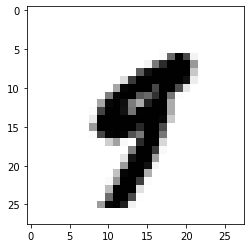

In [10]:

plt.imshow(X.iloc[[36000]].values.reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest') 

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [12]:
y.iloc[[36000]]

36000    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [15]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [16]:
y5_train = np.where(y_train == '5', 1, 0)
y5_test = np.where(y_test == '5',1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression() 

## Data splitting

log_model.fit(X_train, y5_train)

C:\Users\lehai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [23]:
prediction=log_model.predict(X_train)
prediction[36000]

#Correct

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [21]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [22]:
never_5_clf.fit(X_train,y5_train)
never_5_pred = never_5_clf.predict(X_test)


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = log_model.predict(X_test)

print("Logistic regression")
print("matrix : \n",confusion_matrix(y5_test, y_pred_lr))
print("accuracy: ",accuracy_score(y5_test, y_pred_lr))
print("precision",precision_score(y5_test, y_pred_lr))
print("recall", recall_score(y5_test, y_pred_lr))
print("f1_soce", f1_score(y5_test, y_pred_lr))

# Comparison for never 5
print("\nNever 5")
print("matrix : \n",confusion_matrix(y5_test, never_5_pred))
print("accuracy: ",accuracy_score(y5_test, never_5_pred))
print("precision",precision_score(y5_test, never_5_pred))
print("recall", recall_score(y5_test, never_5_pred))
print("f1_soce", f1_score(y5_test, never_5_pred))


Logistic regression
matrix : 
 [[9034   74]
 [ 147  745]]
accuracy:  0.9779
precision 0.9096459096459096
recall 0.8352017937219731
f1_soce 0.8708357685563999

Never 5
matrix : 
 [[9108    0]
 [ 892    0]]
accuracy:  0.9108
precision 0.0
recall 0.0
f1_soce 0.0


C:\Users\lehai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [28]:
#The first model works much better 

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

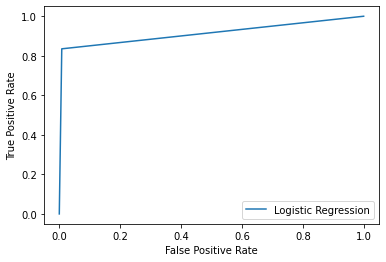

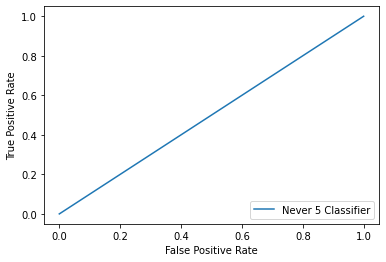

In [33]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns 

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y5_test, y_pred_lr)

roc_auc_lr = auc(fpr_lr, tpr_lr)
display_lr = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr)
display_lr.plot(name = 'Logistic Regression')
plt.show()

fpr_n5, tpr_n5, thresholds_n5 = roc_curve(y5_test,never_5_pred)
roc_auc_n5 = auc(fpr_n5, tpr_n5)
display_n5 = RocCurveDisplay(fpr=fpr_n5, tpr=tpr_n5)
display_n5.plot(name = 'Never 5 Classifier')

plt.show()


### Now find the roc_auc_score for each. 

In [34]:
from sklearn.metrics import roc_auc_score

print('Roc_auc score - Logistic regression:', roc_auc_score(y5_test, y_pred_lr))
print('\nRoc_auc score - Never 5 Clasifier:', roc_auc_score(y5_test,never_5_pred))

Roc_auc score - Logistic regression: 0.9135385341029717

Roc_auc score - Never 5 Clasifier: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
#The Logistic Regression model is better than Never 5 Classifier